In [14]:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *
import cmocean as cm
%matplotlib inline

In [15]:
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_u_satellite_1yrs.nc')
u_mean=squeeze(ncfile.variables['U_mean'][:])
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/mean_ssha_v_satellite_1yrs.nc')
v_mean=squeeze(ncfile.variables['V_mean'][:])

(<matplotlib.figure.Figure at 0x7f8712b4fbe0>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8712c64048>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7f8712aba748>]], dtype=object))

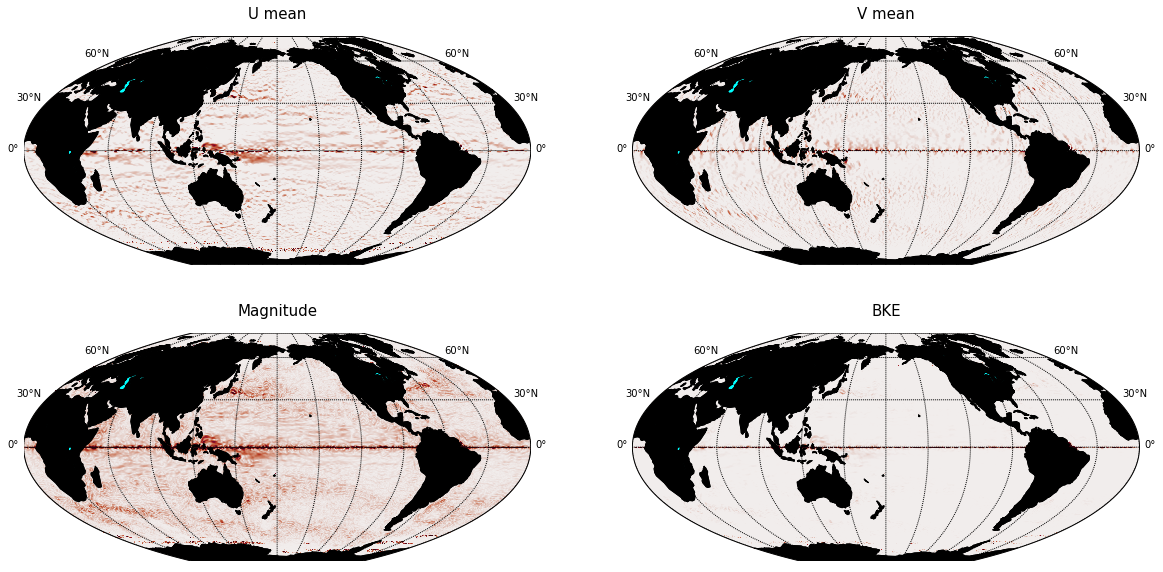

In [16]:
basemap_mplot(lon,lat,[u_mean,v_mean,sqrt(u_mean**2+v_mean**2),KE(u_mean,v_mean)],\
              title=["U mean","V mean","Magnitude","BKE"],scale='Lin',cmap=cm.cm.amp\
              ,projection='mbtfpq',lon_0=-180,vmin=0,vmax=0.5,xan=2,yan=2,figsize=(20,10),fontsize=15)

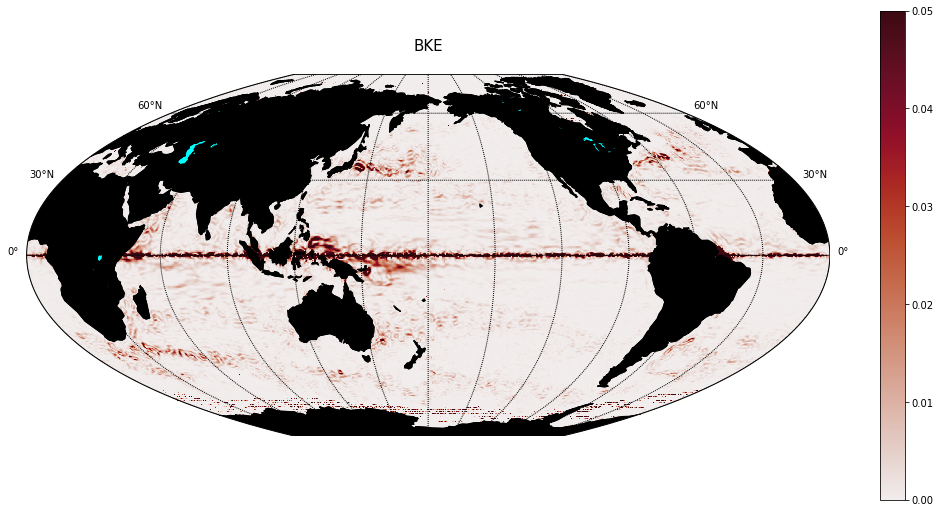

In [17]:
basemap_mplot(lon,lat,KE(u_mean,v_mean),\
              title="BKE",scale='Lin',cmap=cm.cm.amp,projection='mbtfpq',lon_0=-180\
              ,vmin=0,vmax=0.05,xan=1,yan=1,figsize=(18,9),fontsize=15)
colorbar()

In [5]:
from calendar import monthrange
year=1993
monthsin=[1,4,7,10]
monthsend=[4,7,10,13]
name='EKE'
units='m^2/S^2'
nc_description='EKE of the Southern Ocean of January over 1 years'
dim='2D'
index=0
eke_mean=zeros(365)

for ii in range(len(monthsin)):
    print('File:',monthsin[ii])
    ufilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_u_satellite_'+str(year)+'_'+str(monthsin[ii])+'yrs.nc')
    u_prime=squeeze(ufilename.variables['U'][:])
    vfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/ssha_v_satellite_'+str(year)+'_'+str(monthsin[ii])+'yrs.nc')
    v_prime=squeeze(vfilename.variables['V'][:])
    print(shape(v_prime))
    dayssum=0
    for month in range(monthsin[ii],monthsend[ii]):
        dayssum=dayssum+monthrange(int(year), month)[1] 
    
    eke=zeros([shape(v_prime)[0],shape(v_prime)[1],shape(v_prime)[2]])

    for tt in range(0,shape(v_prime)[0]):
        ekecal=KE(u_prime[tt,:,:],v_prime[tt,:,:])
        eke[tt,:,:]=ekecal
        eke_mean[index]=np.nanmean(ekecal)
        index=index+1
    ekefilename='/home/156/jm5970/notebooks/traceddy/data.input/eke_'+str(year)+'_'+str(ii)+'.nc'
    vargeonc(ekefilename,lat,lon,eke,shape(eke)[0],name,nc_description=nc_description,units=units,dt='',dim=dim)    

File: 1
(90, 720, 1440)
90
File: 4
(91, 720, 1440)
91
File: 7
(92, 720, 1440)
92
File: 10
(92, 720, 1440)
92


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='mbtfpq',lon_0=-180,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
quad1 = ax1.pcolormesh(lonm,latm,eke[0,:,:],shading='gouraud',cmap=cm.cm.amp,\
              vmin=0,vmax=0.06)
cb1 = fig.colorbar(quad1,ax=ax1)

def init():
    quad1.set_array([])
    return quad1

def animate(iter):
    quad1.set_array(eke[iter,:,:].ravel())
    return quad1

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=False)
plt.close()
anim2

KeyboardInterrupt: 

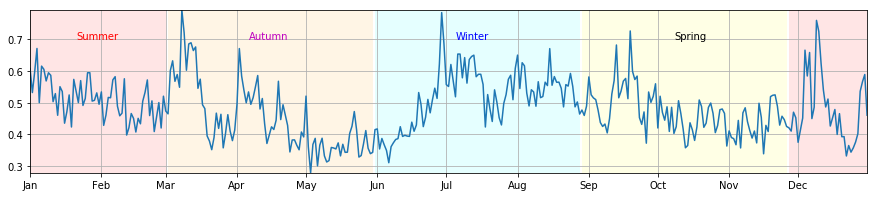

In [9]:
numdays=365
base = datetime.datetime(1993, 1, 1, 0, 0)
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]

#figure(figsize=(15,3))
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(date_list,eke_mean,'-')

plt.text(date_list[20], 0.7,'Summer',color='red')
fill_between(date_list[0:60], eke_mean.min(), eke_mean.max(), facecolor='red', alpha=0.1)
plt.text(date_list[95], 0.7,'Autumn',color='m')
fill_between(date_list[60:150], eke_mean.min(), eke_mean.max(), facecolor='orange', alpha=0.1)
plt.text(date_list[185], 0.7,'Winter',color='Blue')
fill_between(date_list[150:240], eke_mean.min(), eke_mean.max(), facecolor='cyan', alpha=0.1)
plt.text(date_list[280], 0.7,'Spring',color='Black')
fill_between(date_list[240:330], eke_mean.min(), eke_mean.max(), facecolor='yellow', alpha=0.1)
fill_between(date_list[330:], eke_mean.min(), eke_mean.max(), facecolor='red', alpha=0.1)
ax.grid(True)
ax.set_xlim(date_list[0],date_list[-1])
ax.set_ylim(eke_mean.min(), eke_mean.max())

monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

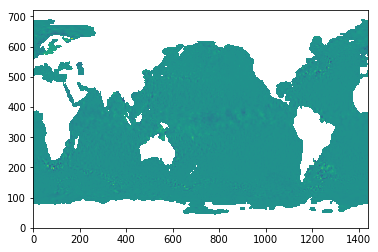

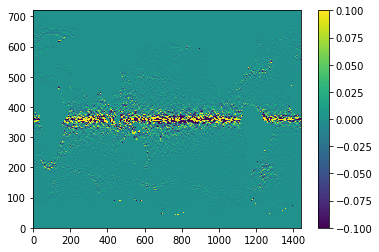

0.607266349337 0.53296863439


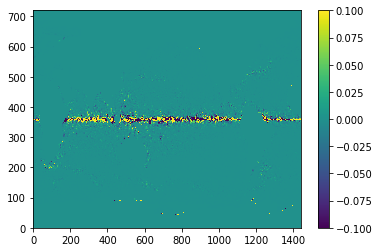

In [22]:
inputfiles='/g/data/ua8/CMEMS_SeaLevel/v3-0/'+str(year)+'/'
ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_19930101_20170110.nc')
ssha=squeeze(ncfile.variables['sla'][:])
ncfile=Dataset(inputfiles+'dt_global_allsat_phy_l4_19930102_20170110.nc')
ssha2=squeeze(ncfile.variables['sla'][:])
pcolormesh(ssha-ssha2)

mask=ma.getmask(ssha[:,:])
            
u_g,v_g=geovelfield(ssha,lon,lat,mask)
u_g2,v_g2=geovelfield(ssha2,lon,lat,mask)
show()
pcolormesh(u_g-u_g2,vmin=-0.1,vmax=0.1)
colorbar()

eke=KE(u_g,v_g)
eke2=KE(u_g2,v_g2)
show()
pcolormesh(eke-eke2,vmin=-0.1,vmax=0.1)
colorbar()
print(mean(eke),mean(eke2))

In [15]:
outfile='/g/data/v45/jm5970/trackeddy_out/'
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])

name='EKE_eddy'
units='m^2/S^2'
nc_description='EKE of the Southern Ocean of January over 1 years'
dim='2D'

for ii in range(6,10):
    print('File: 30'+str(ii))
    read_dictionary1 = np.load(outfile+'30'+str(ii)+'_pos.npy')
    eddytd=read_dictionary1.item()
    
    read_dictionary1n = np.load(outfile+'30'+str(ii)+'_neg.npy')
    eddytdn=read_dictionary1n.item()
    
    outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output30'+str(ii)+'/'
    ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
    ssha=(ncfile.variables['eta_t'][:]*100)-ssh_mean
    
    ekefilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_30'+str(ii)+'.nc')
    eke=ekefilename.variables['EKE'][:]
    
    threshold=3
    eke_eddy=exeddydt(eddytd,lat,lon,eke,threshold,inside=ssha[:,:,:],diagnostics=False)
    eke_back=eke-eke_eddy
    
    eke_eddyfilename='/home/156/jm5970/notebooks/traceddy/data.input/eke_eddy_30'+str(ii)+'.nc'
    vargeonc(eke_eddyfilename,lat,lon,eke,shape(eke)[0],name,\
             nc_description=nc_description,units=units,dt='',dim=dim)  
    eke_eddyfilename='/home/156/jm5970/notebooks/traceddy/data.input/eke_back_30'+str(ii)+'.nc'
    vargeonc(eke_eddyfilename,lat,lon,eke_back,shape(eke_back)[0],name,\
             nc_description=nc_description,units=units,dt='',dim=dim)

File: 306
*******Removing of eddies******
*******End the Removing of eddies******
File: 307
*******Removing of eddies******
*******End the Removing of eddies******
File: 308
*******Removing of eddies******
*******End the Removing of eddies******
File: 309
*******Removing of eddies******
*******End the Removing of eddies******


In [ ]:
basemap_mplot(lon,lat,[KE(u_mean,v_mean),eke[0,:,:],eke_eddy[0,:,:],eke_back[0,:,:]],\
              title=["BKE","EKE","BKE{_eddy}","BKE{_eddy}"],scale='Lin',cmap=cm.cm.amp\
              ,vmin=0,vmax=200,xan=2,yan=2,figsize=(10,10),fontsize=15)
colorbar()

In [17]:
eke_eddy_mean=zeros([365])
index=0
for ii in range(6,10):
    print('File: 30'+str(ii))
    eke_eddyfilename=Dataset('/home/156/jm5970/notebooks/traceddy/data.input/eke_eddy_30'+str(ii)+'.nc')
    eke_eddy=eke_eddyfilename.variables['EKE_eddy'][:]
    eke_eddy[eke_eddy==0]=np.nan
    for ii in range(0,shape(eke_eddy)[0]):
        eke_eddy_mean[index]=np.nanmean(eke_eddy[ii,:,:])
        index=index+1

File: 306
File: 307
File: 308
File: 309


In [18]:
count=0
for ii in range(0,len(eke_eddy_mean)):
    if eke_eddy_mean[ii]==0:
        eke_eddy_mean[ii]=nan
        count=count+1
print(count)
len(eke_eddy_mean)

0


365

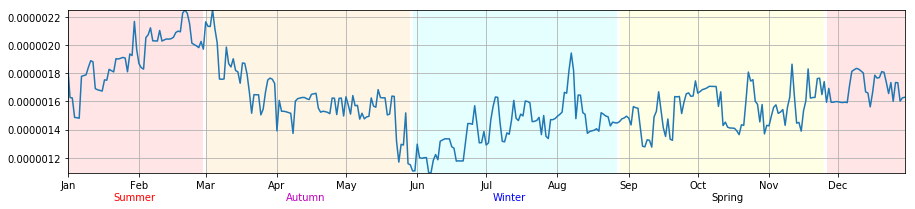

In [20]:
numdays=365
base = datetime.datetime(1992, 1, 1, 0, 0)
date_list = [base + datetime.timedelta(days=x) for x in range(0, numdays)]

#figure(figsize=(15,3))
fig, ax = plt.subplots(figsize=(15,3))

ax.plot(date_list,eke_eddy_mean,'-')

plt.text(date_list[20], 0.0000009,'Summer',color='red')
fill_between(date_list[0:60], eke_eddy_mean.min(), eke_eddy_mean.max(), facecolor='red', alpha=0.1)
plt.text(date_list[95], 0.0000009,'Autumn',color='m')
fill_between(date_list[60:150], eke_eddy_mean.min(), eke_eddy_mean.max(), facecolor='orange', alpha=0.1)
plt.text(date_list[185], 0.0000009,'Winter',color='Blue')
fill_between(date_list[150:240], eke_eddy_mean.min(), eke_eddy_mean.max(), facecolor='cyan', alpha=0.1)
plt.text(date_list[280], 0.0000009,'Spring',color='Black')
fill_between(date_list[240:330], eke_eddy_mean.min(), eke_eddy_mean.max(), facecolor='yellow', alpha=0.1)
fill_between(date_list[330:], eke_eddy_mean.min(), eke_eddy_mean.max(), facecolor='red', alpha=0.1)
ax.grid(True)
ax.set_xlim(date_list[0],date_list[-1])
ax.set_ylim(eke_eddy_mean.min(), eke_eddy_mean.max())

monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)